# Régession linéaire et corrélations

On essaie d'expliquer linéairement une caractéristique d'un jeu de donnée par rapport à une autre

Ici les données ne sont que des **moyens d'observer des caractéristiques**. On va analyser les caractéristiques.

Reprenons notre modèle matriciel d'un jeu de données. Une donnée $x_i$ est décrite par $m$ caractéristiques réelles. La donnée $x_i$ est ainsi assimilable à un vecteur $x_i = (x_i^1, \dots, x_i^m)$ de $\mathbb{R}^m$. Si l'on possède $n$ données, on peut les représenter sous la forme d'une matrice :

$$X = \left(
\begin{array}{cccccc}
x^1_1&\dots &x^j_1 &\dots &x_1^m\\
     &      &\vdots&      &  \\
x_i^1&\dots &x^j_i &\dots &x_i^m\\
     &      &\vdots&      & \\
x_n^1&\dots &x^j_n&\dots &x_n^m
\end{array}
\right)$$

Où :

* une donnée est un vecteur ligne $x_i$ à $m$ coordonnées
* un caractère est un vecteur colonne  $x^j$  à $n$ coordonnées

On reprend les données de l'épreuve :

In [33]:
import pandas

épreuve = pandas.read_csv("./épreuve.txt", delim_whitespace=True)
épreuve

,temps,erreurs
0,15,4
1,15,5
2,20,10
3,10,0
4,15,4
5,30,10
6,10,2
7,10,5
8,5,0
9,5,10


On centre et on réduit les données puisque l'on veut comparer des données entre elles

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
épreuve_scaled_sklearn = scaler.fit_transform(pandas.DataFrame(épreuve, dtype='float')) # sinon warning de conversion
épreuve_scaled = pandas.DataFrame(épreuve_scaled_sklearn, columns=épreuve.columns)
épreuve_scaled

,temps,erreurs
0,-0.020341,-0.130250
1,-0.020341,0.151959
2,0.508513,1.563003
3,-0.549194,-1.259086
4,-0.020341,-0.130250
5,1.566219,1.563003
6,-0.549194,-0.694668
7,-0.549194,0.151959
8,-1.078047,-1.259086
9,-1.078047,1.563003


# Régression

https://en.wikipedia.org/wiki/Simple_linear_regression

Lorsque l'on cherche à expliquer une caractéristique par rapport à une autre, il faut déterminer comment passer d'une caractéristique à l'autre. 

La façon la plus simple de procéder est de considérer que leur liaison est linéaire.

## Calcul

Formellement, si l'on veut expliquer la caractéristique $x^k$ par la caractéristique $x^j$, on veut que pour tout individu $x_i$ on ait :

$$
x_i^k \sim a + b \cdot x_i^j
$$

Avec $a$ et $b$ des constantes pour tout $i$ qu'il faut déterminer.

On peut alors faire une minimisation des moindres carrés pour trouver $a$ et $b$, ce qui revient à utiliser la distance $L_2$ entre la colonne observée et la colonne approximée.

C'est à dire que l'on cherche les valeurs minimisant la fonction :

$$
f(x, y) = \frac{1}{n}\sum_{1 \leq i \leq n}^n(x^k_i - (x + y * x^j_i))^2
$$

Ceci se fait facilement en dérivant par rapport aux 2 variables et en cherchant à annuler les dérivés.

On obtient :

On obtient :

$$a = \overline{x^k} - b\overline{x^j}$$
$$b = \frac{cov(x^j, x^k)}{\sigma^2(x^j)}$$

Avec : 

$$cov(x^j, x^k) = \frac{1}{n} \sum_{i=1}^n(x^j_i - \overline{x^j})(x^k_i - \overline{x^k})$$

## Python

On utilise le module [`statsmodels`](https://www.statsmodels.org/stable/index.html), et plus particulierement ses outils de [régression linéaire](https://www.statsmodels.org/stable/regression.html) pour réaliser en python la régression linéaire.

In [35]:
import statsmodels.api as sm

On commence par créer un modèle. On veut quelque chose du genre : 
$$ 
erreurs = a+ b \cdot temps
$$

Avec les données centrées et réduites.

In [36]:
modèle = sm.OLS(épreuve_scaled['erreurs'], sm.add_constant(épreuve_scaled['temps']))

> **Attention !** Si vous n'joutez pas la constante, votre modèle est juste $erreurs = b \cdot temps$

In [37]:
# A tester plus tard

# modèle = sm.OLS(épreuve_scaled['erreurs'], épreuve_scaled['temps'])

On cherche ensuite les paramètres de la régression (ici $a$ et $b$) en résolvant le système avec les moindres carrés :

In [38]:
régression = modèle.fit()

In [39]:
régression.params

const   -6.054233e-17
temps    7.665469e-01
dtype: float64

Les paramètres $a$ et $b$ sont alors atteignable avec les paramètres de la régression :

In [40]:
a = régression.params['temps']
b = régression.params['const']

On peut ensuite représenter graphiquement le résultat :

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
current_palette = sns.color_palette()

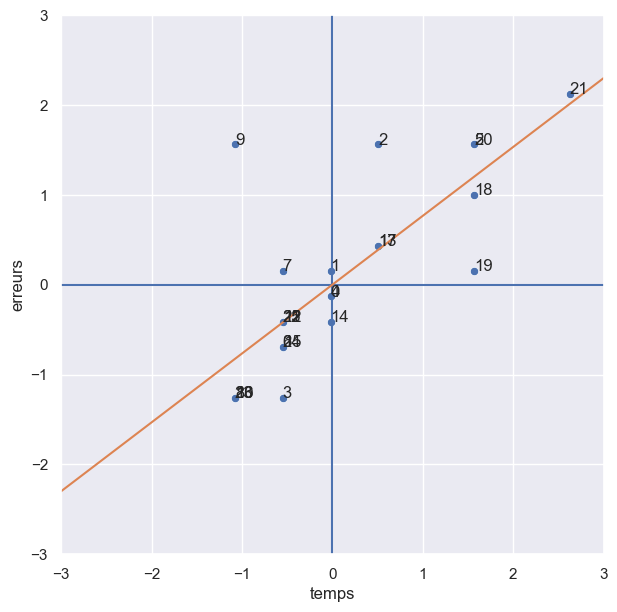

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax = sns.scatterplot(data=épreuve_scaled,
                     x='temps', 
                     y='erreurs',
                     ax=ax
                    )
for i in épreuve.index:
    ax.text(épreuve_scaled['temps'][i], épreuve_scaled['erreurs'][i], str(i))

ax.axvline(0, color=current_palette[0])
ax.axhline(0, color=current_palette[0])

plt.plot(ax.get_xlim(), [ x * a + b for x in ax.get_xlim()], color=current_palette[1])
    
plt.show()

## Erreur

Est-ce un bon résultat ? Pour le savoir il faut calculer le delta entre la valeur réelle et la valeur approximée en chaque point. Lerreur totale s'écrit (en norme $L_2$) : 

$$
E = \sum_{i=1}^n(x^k_i - (a + b \cdot x^j_i))^2
$$ 

En remplaçant $a$ et $b$ par leurs formules, on trouve :

$$
E = \sigma^2(x^k)(1 - (\frac{cov(x^j, x^k)}{\sigma(x^j)\sigma(x^k)})^2)
$$

La qualité de la régression sera dnc d'autant meilleur que E sera petit. On doit donc avoir:
* un petit $\sigma^2(y)$ (que l'on peut supposer $>0$)
* un gros $(\frac{cov(x, y)}{\sigma(x)\sigma(y)})^2$

Comme $E\geq 0$ on a forcément que $0\leq (\frac{cov(x, y)}{\sigma(x)\sigma(y)})^2 \leq 1$ et que les points sont alignées ($E = 0$) si et seulement si $(\frac{cov(x, y)}{\sigma(x)\sigma(y)})^2 = 1$. **C'est la mesure principale pour la qualité de la régression**. 

> on appelle ***coefficient de corrélation linéaire*** la quantité :
$$ r(x, y) = \frac{cov(x, y)}{\sigma(x)\sigma(y)})$$

Avec pandas, on le trouve facilement, c'est une méthode des colonnes : [`pandas.Series.corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html)

In [43]:
épreuve_scaled['temps'].corr(épreuve_scaled['erreurs'])

0.7665468544740968

Ou directement les corrélations deux à deux sur un `pandas.Dataframe` avec la méthode [`pandas.DataFrame.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) :

In [44]:
épreuve_scaled.corr()

,temps,erreurs
temps,1.000000,0.766547
erreurs,0.766547,1.000000


Et le $r^2$ : 

In [45]:
#r^2 

0.766547 ** 2

0.587594303209

On retrouve bien que chaque axe est parfaitement linéairement corrélé avec lui-même (ouf) et que la corrélation linéaire d'une axe avec l'autre est identique

On retrouve ce coefficient (`R-squared`), et plein d'autre dans :

In [46]:
régression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                erreurs   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     34.20
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.96e-06
Time:                        11:01:13   Log-Likelihood:                -25.378
No. Observations:                  26   AIC:                             54.76
Df Residuals:                      24   BIC:                             57.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.054e-17      0.131  -4.62e-16      1.000      -0.271       0.271
temps          0.7665      0.131      5.848      0.000       0.496       1.037
==============================================================================
Omnibus:                       25.149   Durbin-Watson:                   2.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.228
Skew:                           1.938   Prob(JB):                     9.16e-11
Kurtosis:                       8.258   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le coefficient de corrélation est identique sur les données centrées/réduite et sur les données initiales : les données ne sont pas plus corrélées linéairement entres elle. C'est normale puisque centrer et réduire est une transformation linéaire de nos données.

En revanche, la pente (qui dépend de la variance) et la constante (qui dépend de la moyenne) changent, en particulier la droite ne passe maintenant plus par l'origine (la moyenne n'est pas nulle).

Notez que l'on peut faire en une seule commande la régression et voir son résultat, ci-après sur les données non centrée et réduites :

In [47]:
(sm.OLS(épreuve['erreurs'], 
                    sm.add_constant(épreuve['temps']))
    .fit()
    .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                erreurs   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     34.20
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.96e-06
Time:                        11:01:13   Log-Likelihood:                -58.270
No. Observations:                  26   AIC:                             120.5
Df Residuals:                      24   BIC:                             123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0968      0.879      0.110      0.913      -1.718       1.911
temps          0.2873      0.049      5.848      0.000       0.186       0.389
==============================================================================
Omnibus:                       25.149   Durbin-Watson:                   2.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.228
Skew:                           1.938   Prob(JB):                     9.16e-11
Kurtosis:                       8.258   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Notez** que si les paramètres de régression sont différents entre les données initiales et les données centrées et réduite, le **coefficient de corrélation est le même**

# Coefficient de corrélation linéaire

Dans l'optique d'une analyse des données, il est important de considérer le coéfficient de corrélation linéaire $r(x, y)$ entre deux colonnes $x$ et $y$.

Il a plein de propriétés :

* $r(x, y) = r(y, x)$
* $-1 \leq r(x, y) \leq 1$
* si $\vert r(x, y) \vert = 1$ alors $x$ et $y$ sont linéairement dépendant

On s'en sert comme ça :

* si $r(x, y)$ est proche de 1, alors :
    * $x$ et $y$ sont corrélés positivement (presque linéairement dépendant) 
    * lorsque $x$ augmente alors $y$ augmente et lorsque $x$ diminue alors $y$ diminue
    * lorsque $y$ augmente alors $x$ augmente et lorsque $y$ diminue alors $x$ diminue
* si $r(x, y)$ est proche de -1, alors 
    * $x$ et $y$ sont corrélés négativement (presque linéairement dépendant) 
    * lorsque $x$ augmente alors $y$ diminue et lorsque $x$ diminue alors $y$ augmente
    * lorsque $y$ augmente alors $x$ diminue et lorsque $y$ diminue alors $x$ augmente
    

# Régression opposée

Il n'y a aucune raison de privilégier une variable plutôt qu'une autre ici. Que donne la regression de l'erreur par le temps ?

In [48]:
régression2 = sm.OLS(épreuve_scaled['temps'], 
                                 sm.add_constant(épreuve_scaled['erreurs'])).fit()

régression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  temps   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     34.20
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.96e-06
Time:                        11:01:13   Log-Likelihood:                -25.378
No. Observations:                  26   AIC:                             54.76
Df Residuals:                      24   BIC:                             57.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.168e-17      0.131   3.18e-16      1.000      -0.271       0.271
erreurs        0.7665      0.131      5.848      0.000       0.496       1.037
==============================================================================
Omnibus:                       16.180   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.368
Skew:                          -1.122   Prob(JB):                     1.14e-06
Kurtosis:                       7.498   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le coefficition de corrélation linéaire est bien le même mais les paramètres sont différents.

In [49]:
a_prim = régression2.params.erreurs
b_prim = régression2.params.const

Représentaons les 2 régressions sur le même graphique :

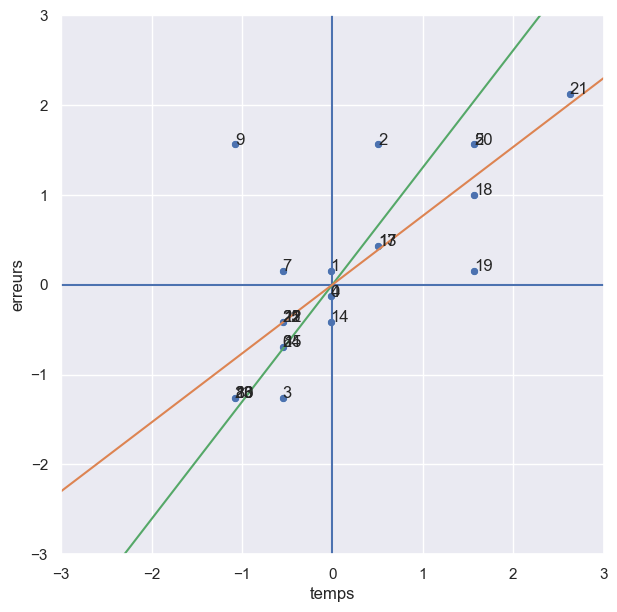

In [50]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax = sns.scatterplot(data=épreuve_scaled,
                     x='temps', 
                     y='erreurs',
                     ax=ax
                    )
for i in épreuve.index:
    ax.text(épreuve_scaled['temps'][i], épreuve_scaled['erreurs'][i], str(i))

ax.axvline(0)
ax.axhline(0)

plt.plot([ x * a_prim + b_prim for x in ax.get_ylim()], ax.get_ylim(), color=current_palette[2])
plt.plot(ax.get_xlim(), [ x * a + b for x in ax.get_xlim()], color=current_palette[1])
    
plt.show()

![Régression optimisation](régression-opti.png)

Pour une régression on minimise la somme des longueurs rouges, pour l'autre la somme des longueurs vertes : il n'y a aucune raisons pour que ces deux optimisations soient égales !

> Comme $y = ax + b$ et $x = a'y + b'$, les deux droites ne peuvent être égales que si $a = \frac{1}{a'} $, c'est à dire que $r(x, y)^2 = 1$ : **les deux droites de régression ne sont égales que si et seulement si les points sont alignés sur une droite**.

Il nous faut trouver un autre moyen d'approximer nos points par une droite car on ne peut ici privilégier l'un ou l'autre des axes. Par exemple la bissectrice ?

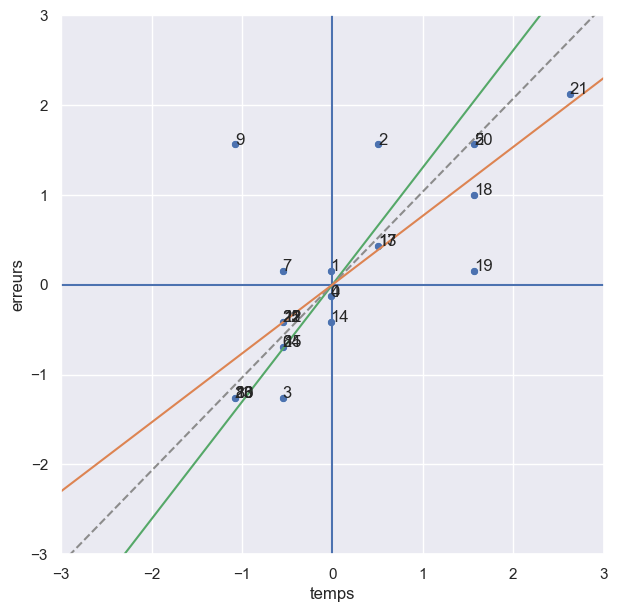

In [51]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax = sns.scatterplot(data=épreuve_scaled,
                     x='temps', 
                     y='erreurs',
                     ax=ax
                    )
for i in épreuve.index:
    ax.text(épreuve_scaled['temps'][i], épreuve_scaled['erreurs'][i], str(i))

ax.axvline(0)
ax.axhline(0)

plt.plot([ x * a_prim + b_prim for x in ax.get_ylim()], ax.get_ylim(), color=current_palette[2])
plt.plot(ax.get_xlim(), [.5 * (a + 1/a_prim) * x + b for x in ax.get_xlim()], color=current_palette[7], linestyle="--")
plt.plot(ax.get_xlim(), [ x * a + b for x in ax.get_xlim()], color=current_palette[1])
    
plt.show()

> On en reparlera dans le cours suivant, mais cela (en 2D) est équivalent à minimser la projection.

# seaborn

Seaborn nous aide et permet de représenter facilement les régressions avec [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html).

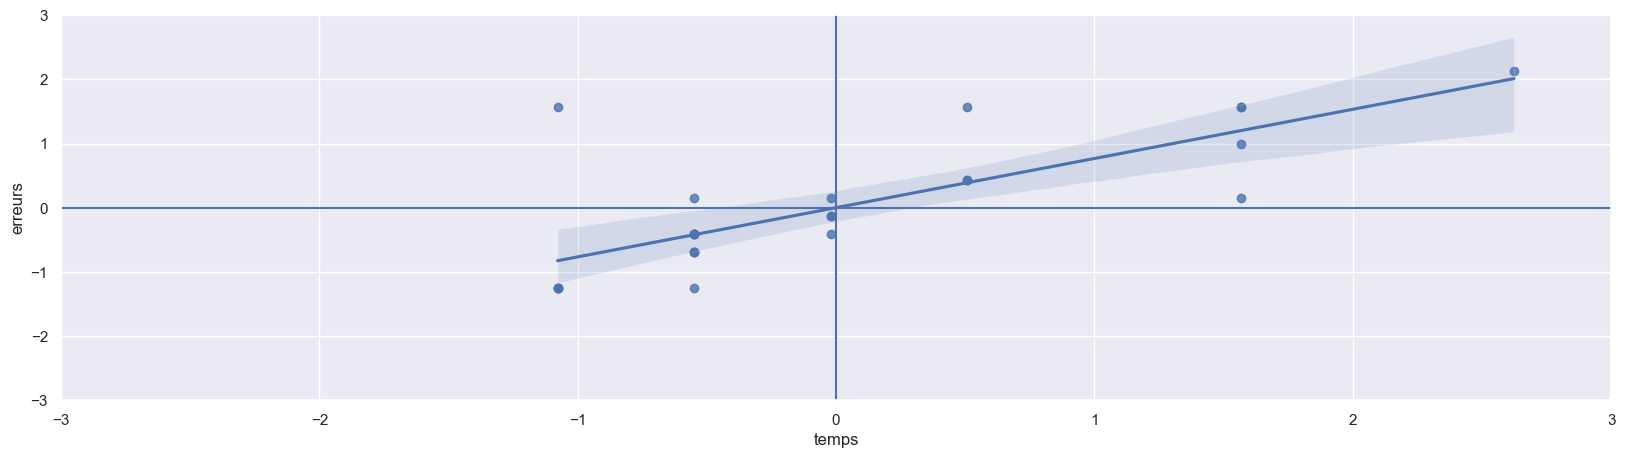

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

sns.regplot(data=épreuve_scaled,
            x='temps',
            y='erreurs',
            ax=ax
          )
ax.axvline(0)
ax.axhline(0)

plt.show()

La zone bleue est l'erreur.  Toutes les deroites dans cette zone peuvent être considérées comme des droites de régression (à 95%)

> **A lire** :  https://serialmentor.com/dataviz/visualizing-uncertainty.html#uncertainty-curve-fits tout le livre qui est super et cette partie en particulier. 

## Matrice de corrélation

Lorsque l'on a plus de 2 variables, la matrice de corrélation est difficile à lire d'un seul coup d'oeil. 

Prenons par exemple els iris de fisher :

In [53]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
iris.corr()

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


On peut alors utiliser une [`seaborn.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) pour rendre tout ça plus visuel.

On a utilisé la palette de couleur `'coolwarm'` de matplotlib. La gestion des [palettes de couleur en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) est — comme tout ce qui a trait à matplotlib — inutilement compliquée mais farfois on ne peut pas faire autrement que de l'utiliser (et de pester).

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/3435964609.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = iris.corr()


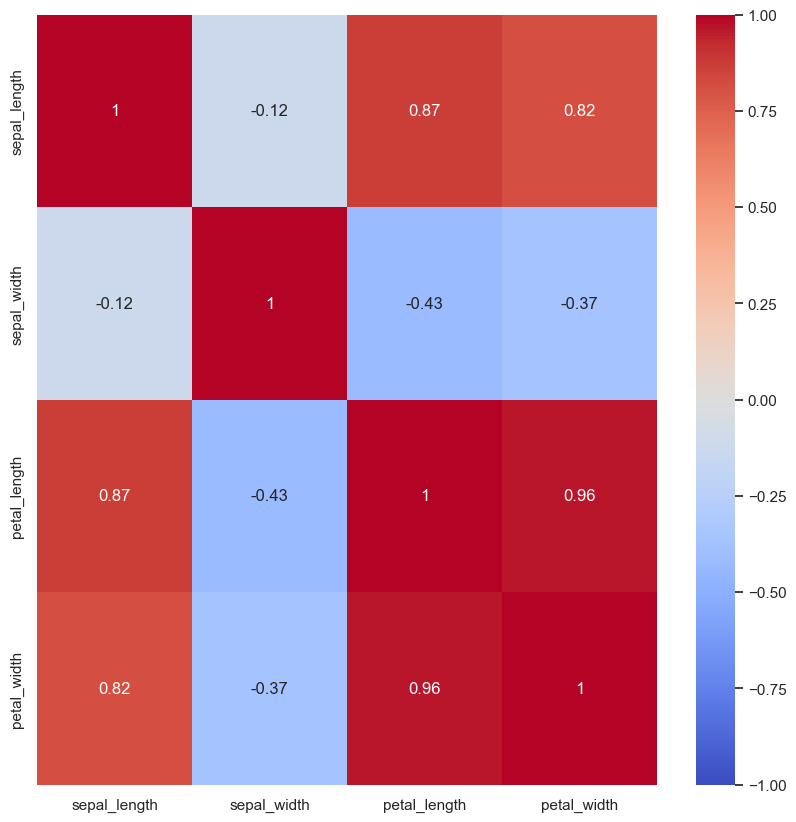

In [55]:
data = iris.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1, vmax=1)
plt.show()

Ou les corrélations au carré (attention à `*` qui n'est [pas la multiplication de matrice](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.multiply.html)) :

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/2336239682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = iris.corr() * iris.corr()


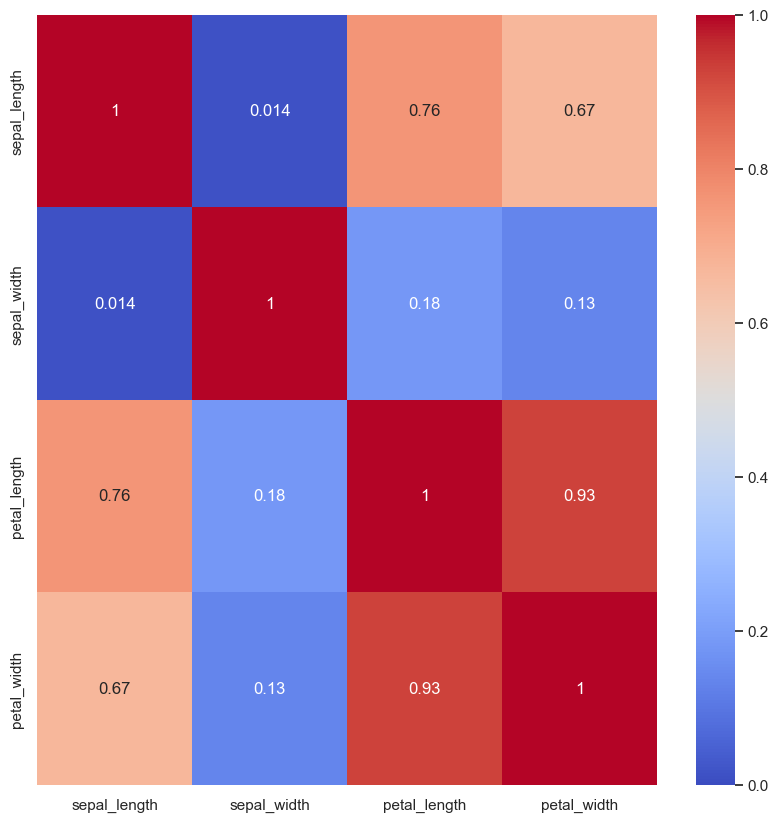

In [56]:
data = iris.corr() * iris.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=0, vmax=1)
plt.show()

On voit bien les colonnes corrélées entre elles (proches de 1, rouge) et celles qui ne le sont pas (proche de 0, en bleu)

Si on veut voir les valeurs absolues de la corrélation, on peut utiliser une [map](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html). Cela consiste à appliquer une fonction donnée à chaque élément du dataframe (ici la fonction [abs](https://docs.python.org/3/library/functions.html#abs)).

In [57]:
# sans la map
iris.corr()

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/801088901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [58]:
# avec la map 
iris.corr().applymap(abs)

/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/437430190.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr().applymap(abs)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.117570,0.871754,0.817941
sepal_width,0.117570,1.000000,0.428440,0.366126
petal_length,0.871754,0.428440,1.000000,0.962865
petal_width,0.817941,0.366126,0.962865,1.000000


/var/folders/0s/jt5m4vnj797928hhz0rb01jw0000gn/T/ipykernel_14244/913247676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = iris.corr().applymap(abs)


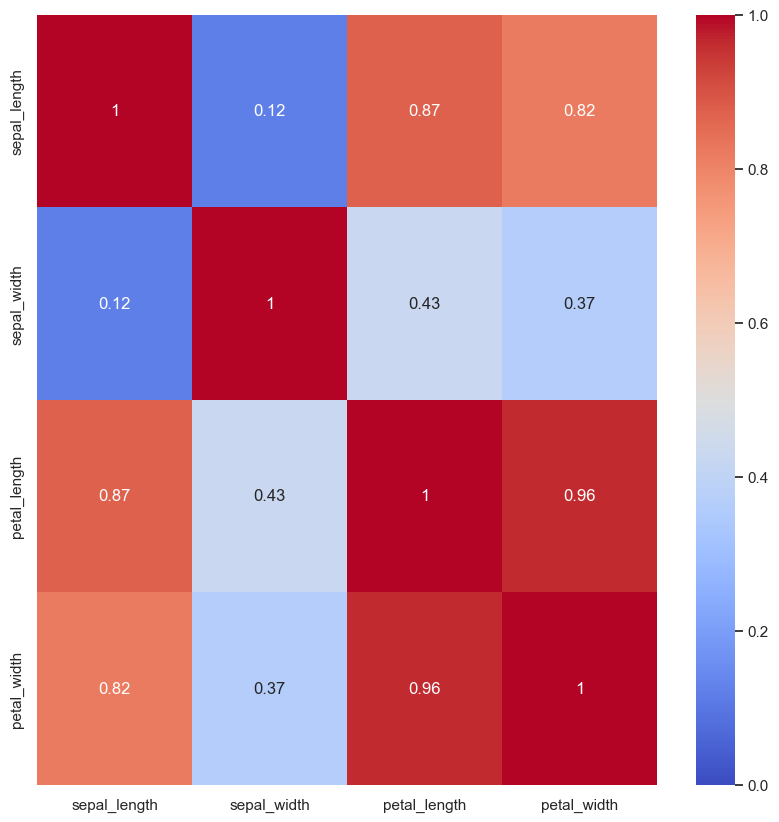

In [59]:
data = iris.corr().applymap(abs)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data, 
            annot=True, 
            cmap='coolwarm',
            vmin=0, vmax=1)
plt.show()